In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import re

In [2]:
# Load dataset
data = pd.read_csv('sentiment_data.csv')

In [3]:
print(data.head(5))

                                               tweet   labels
0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1  Try talking with ChatGPT, our new AI system wh...     good
2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3  THRILLED to share that ChatGPT, our new model ...     good
4  As of 2 minutes ago, @OpenAI released their ne...      bad


In [4]:
print(data.describe())

          tweet  labels
count    219294  219294
unique   217622       3
top     ChatGPT     bad
freq        122  107796


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweet   219294 non-null  object
 1   labels  219294 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB
None


In [6]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 219294):
  #Remove any non-alphabetic characters from the tweet
  tweet = re.sub('[^a-zA-Z]', ' ', data['tweet'][i])
  #Convert the tweet to lowercase
  tweet = tweet.lower()
  #Split the tweet into a list of words
  tweet = tweet.split()
  ps = PorterStemmer()
  #Get the list of english stopwords from nltk
  all_stopwords = stopwords.words('english')
  #Remove the word ‘not’ from the stopwords list as it can be useful for sentiment analysis because sometimes "not" before some keywords create a positive meaning
  all_stopwords.remove('not')
  #Apply stemming to each word in the tweet and remove any stopwords
  tweet = [ps.stem(word) for word in tweet if not word in set(all_stopwords)]
  #Join the words back into a single string
  tweet = ' '.join(tweet)
  #Append the processed tweet to the corpus list
  corpus.append(tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hossein.glm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#Create a count vectorizer object with a maximum of 20000 features (words)
cv = CountVectorizer(max_features = 20000)
#Fit and transform the corpus into a sparse matrix of word counts
X = cv.fit_transform(corpus).toarray()
#Get the target variable (sentiment) from the data as a numpy array
y = data.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [9]:
#Create a multinomial naive bayes classifier object and Fit the classifier on the training data

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [10]:
# Predict the sentiment labels for the test data using the classifier
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
# Vectorize text using TF-IDF
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(data['tweet'])

In [11]:
# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         bad       0.83      0.85      0.84     21740
        good       0.63      0.76      0.69     10948
     neutral       0.56      0.42      0.48     11171

    accuracy                           0.72     43859
   macro avg       0.67      0.68      0.67     43859
weighted avg       0.71      0.72      0.71     43859



<Axes: xlabel='labels', ylabel='count'>

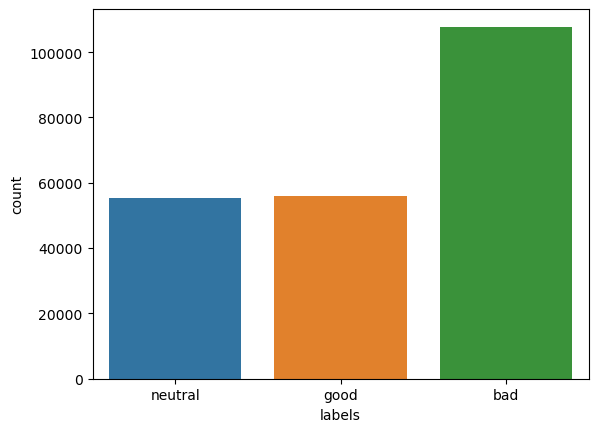

In [13]:
# Distribution of sentiment labels
sns.countplot(x='labels', data=data)

<Axes: xlabel='tweet_length', ylabel='Count'>

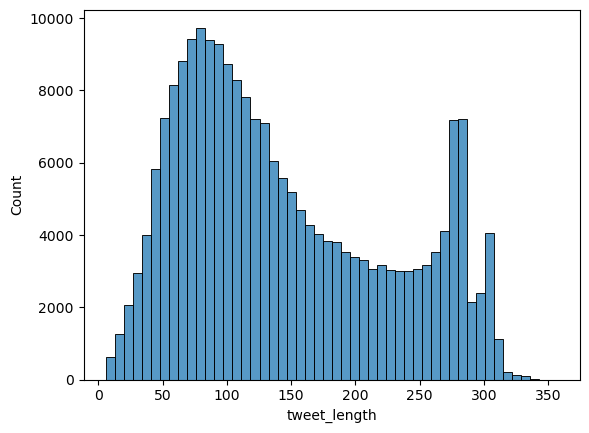

In [14]:
# Distribution of tweet lengths
data['tweet_length'] = data['tweet'].apply(len)
sns.histplot(x='tweet_length', data=data, bins=50)

<Axes: >

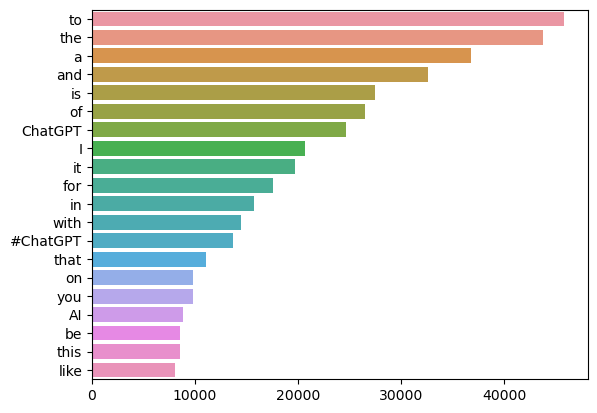

In [15]:
# Top 20 most common words in positive tweets
positive_tweets = data[data['labels'] == 'good']
positive_word_freq = pd.Series(' '.join(positive_tweets['tweet']).split()).value_counts()
top_positive_words = positive_word_freq.head(20)
sns.barplot(x=top_positive_words.values, y=top_positive_words.index)

<Axes: >

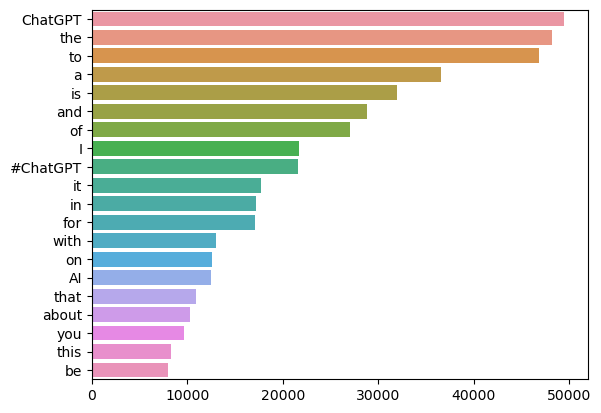

In [19]:
# Top 20 most common words in negative tweets
negative_tweets = data[data['labels'] == 'bad']
negative_word_freq = pd.Series(' '.join(negative_tweets['tweet']).split()).value_counts()
top_negative_words = negative_word_freq.head(20)
sns.barplot(x=top_negative_words.values, y=top_negative_words.index)